# Decision Tree
Conny Lin | June 13, 2020

## set up


### local computer

In [ ]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import other standard paths and local variables
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
from brainstation_capstone.ml.toolbox import mlSOP
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
from brainstation_capstone.vs.plots import hyperparameterplot
# import standard libraries
import time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# import local libraries using host specific paths
# report latest run
print(f'last ran on: {datetime.datetime.now()} PT')


getting host computer specific paths


In [ ]:
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

### google colab


In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# import functions
print('import functions')
import pandas as pd
import numpy as np
import os, time, datetime
import matplotlib.pyplot as plt

# define file directory
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'

class test_model:
    def __init__(self):
        # set test and train score
        self.test_acc = []
        self.train_acc = []
    def score_data(self, model, datadict):
        self.model = model
        self.data = datadict
        # fit model
        self.model.fit(self.data['X_train'], self.data['y_train'])
        # train score
        train_score = self.model.score(self.data['X_train'], self.data['y_train'])
        print(f"\tTrain Score: {train_score}")
        self.train_acc.append(train_score)
        # test score
        test_score = self.model.score(self.data['X_test'], self.data['y_test'])
        print(f"\tTest Score: {test_score}")
        self.test_acc.append(test_score)

class ml_timer:
    def __init__(self):
        # initate session start time
        self.start = time.time()
        # initiate holder for times
        self.session_times = []
        print('timer starts')

    def param_start(self):
        # update current session start time
        self.current_session_start = time.time()

    def param_end(self):
        end_time = time.time()
        elapsed_time = end_time - self.current_session_start
        print(f'\telapsed time {elapsed_time/60:.3f} min')
        self.session_times.append(elapsed_time)
    
    def session_end(self):
        self.end = time.time()
    
    def get_time(self):
        print(f'total time: {(self.end - self.start)/60:.3f} min')
        return self.session_times

def hyperparameterplot(hyperparameter_list, train_score_list, test_score_list, \
                        hyperparameter_name='', xscale='linear', titlename=''):
    # check if hyperparameter list is string or number
    if isinstance(hyperparameter_list[0], str):
        hyperparameter_label = hyperparameter_list.copy()
        hyperparameter_list = range(len(hyperparameter_list))
    # graph
    plt.figure()
    plt.plot(hyperparameter_list, train_score_list, color='blue', label='train')
    plt.plot(hyperparameter_list, test_score_list, color='red', label='test')
    plt.title(titlename)
    plt.xlabel(hyperparameter_name)
    if isinstance(hyperparameter_list[0], str):
        plt.xticks(labels=hyperparameter_label)
    plt.ylabel('accuracy score')
    plt.xscale(xscale)
    plt.legend()
    plt.show()

def load_nutcracker_csv(dir_datafolder):
    datatype = ['X_train','X_test','y_train','y_test']
    print(f'loading {len(datatype)} files')
    datadict = dict()
    for i, dname in enumerate(datatype):
        print(f'loading file: {i}', end='\r')
        filename = 'nutcracker' + '_' + dname + '.csv'
        filepath = os.path.join(dir_datafolder, filename)
        data = pd.read_csv(filepath, header=None, index_col=False)
        datadict[dname] = data.to_numpy()
    print('\nloading completed')
    return datadict



class ModelEvaluation:
    def __init__(self, model, data_dir):
        self.model = model
        self.data_dir = data_dir
    
    def load_data(self):
        if not hasattr(self, 'data'):
            self.data = load_nutcracker_csv(self.data_dir)

    def cross_val_score(self, cv=5):
        timer = ml_timer()
        if not hasattr(self, 'data'):
            self.load_data()
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(self.model, 
                    self.data['X_train'], 
                    self.data['y_train'], 
                    cv=cv)
        timer.session_end()
        self.runtime_crossval = timer.get_time()
        print(f'cross validation scores: {scores}')
        print(f'validation score (mean):{np.mean(scores)}')
        print(f'validation score (std):{np.std(scores)}')
        self.cross_val_score_ = scores
        return self.cross_val_score_
    
    def fitmodel(self):
        if not hasattr(self, 'data'):
            self.load_data()
        self.model.fit(self.data['X_train'], self.data['y_train'])
        return self.model
    
    def predict(self):
        if not hasattr(self, 'data'):
            self.load_data()
        timer = ml_timer()
        self.y_pred_test = self.model.predict(self.data['X_test'])
        timer.session_end()
        self.runtime_predict = timer.get_time()
        self.y_pred_train = self.model.predict(self.data['X_train'])

    def accuracy_score(self):
        if not hasattr(self, 'data'):
            self.load_data()
        self.score_train = self.model.score(self.data["X_train"], self.data['y_train'])
        print(f'accuracy score on train: {self.score_train}')
        self.score_test = self.model.score(self.data['X_test'], self.data['y_test'])
        print(f'accuracy score on test: {self.score_test}')
        return self.score_train, self.score_test

    def confusion_matrix(self):
        if not hasattr(self, 'y_pred_test'):
            self.predict()
        # fitmodel and predict must proceed this.
        # define dataframe labels
        columns = ['Predicted normal', 'Predicted alcohol']
        indexname = ['True normal', 'True alcohol']
        from sklearn.metrics import confusion_matrix
        # run confusion matrix - test
        self.conf_matrix_test = confusion_matrix(self.data['y_test'], self.y_pred_test, 
                                            normalize='true')
        conf_matrix_test_df = pd.DataFrame(self.conf_matrix_test, columns=columns)
        conf_matrix_test_df.index = indexname
        print('\nconfusion matrix: test data')
        print(conf_matrix_test_df)
        # run confusion matrix - train
        self.conf_matrix_train = confusion_matrix(self.data['y_train'], 
                                            self.y_pred_train, 
                                            normalize='true')
        conf_matrix_train_df = pd.DataFrame(self.conf_matrix_train, columns=columns)
        conf_matrix_train_df.index = indexname
        print('\nconfusion matrix: train data')
        print(conf_matrix_train_df)
        return self.conf_matrix_test, self.conf_matrix_train
    
    def display_confusion_matrix(self):
        if not hasattr(self, 'conf_matrix_test'):
            self.confusion_matrix()
        # confusion_matrix must proceed this
        display_labels = ['normal', 'alcohol']
        from sklearn.metrics import ConfusionMatrixDisplay
        print('\nconfusion matrix for test')
        plt.figure()
        ConfusionMatrixDisplay(self.conf_matrix_test, display_labels=display_labels).plot()
        plt.show()
        print('\nconfusion matrix for train')
        plt.figure()
        ConfusionMatrixDisplay(self.conf_matrix_train, display_labels=display_labels).plot()
        plt.show()

    def classification_report(self):
        if not hasattr(self, 'y_pred_test'):
            self.predict()
        from sklearn.metrics import classification_report
        self.eval_score_report = classification_report(self.data['y_test'], 
                                                        self.y_pred_test)
        print(self.eval_score_report)
    
    def print_evaluation_scores(self):
        if not hasattr(self, 'y_pred_test'):
            self.predict()        
        from sklearn.metrics import precision_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import f1_score
        self.precision_score = precision_score(self.data["y_test"], self.y_pred_test)
        self.recall_score = recall_score(self.data["y_test"], self.y_pred_test)
        self.f1_score = f1_score(self.data["y_test"], self.y_pred_test)
        print(f'precision_score = {self.precision_score}')
        print(f'recall_score = {self.recall_score}')
        print(f'f1_score = {self.f1_score}')
    
    def test_data_class_proba(self):
        if not hasattr(self, 'data'):
            self.load_data()        
        false_proba = np.count_nonzero(self.data['y_test']) / self.data['y_test'].shape[0]
        true_proba = 1.0 - false_proba
        print(f'test set normal case probability: {false_proba}')
        print(f'test set alcohol case probability: {true_proba}')
        self.real_proba = dict()
        self.real_proba['false_proba'] = false_proba
        self.real_proba['true_proba'] = true_proba
    
    def predict_proba(self):
        if not hasattr(self, 'data'):
            self.load_data()
        self.y_proba_test = self.model.predict_proba(self.data['X_test'])[:,1]
        self.y_proba_train = self.model.predict_proba(self.data['X_train'])[:,1]
        return self.y_proba_test, self.y_proba_train

    def proba_thresholds(self):
        if not hasattr(self, 'data'):
            self.load_data()
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from sklearn.metrics import recall_score
        # Vary thresholds by 0.05 from 0.05 to 0.95
        thresholds = np.arange(0.05, 1, 0.05)
        precisions = list()
        recalls = list()
        neg_recalls = list()
        for threshold in thresholds:
            # Apply threshold
            y_threshold = np.where(self.y_proba_test > threshold, 1, 0)
            # Calculate precision and recall
            precision = precision_score(self.data['y_test'], y_threshold)
            recall = recall_score(self.data['y_test'], y_threshold)
            neg_recall = recall_score(1-self.data['y_test'], 1-y_threshold)
            # Append to list
            precisions.append(precision)
            recalls.append(recall)
            neg_recalls.append(neg_recall)
        # Visualize the result
        plt.figure()
        plt.plot(thresholds, precisions, label='precision', marker='o')
        plt.plot(thresholds, recalls, label='recall', marker='o')
        plt.xlim(0, 1)
        plt.xlabel('threshold')
        plt.ylabel('score')
        plt.legend()
        plt.show()
        return precisions, recalls, neg_recalls
        
    def roc_auc(self):
        if hasattr(self, 'y_proba_train'):
            self.predict_proba()
        from sklearn.metrics import roc_curve, roc_auc_score
        # get roc auc train
        fprs_train, tprs_train, thresholds_train = roc_curve(self.data['y_train'], self.y_proba_train)
        roc_auc_train = roc_auc_score(self.data['y_train'], self.y_proba_train)
        # get roc auc test
        fprs_test, tprs_test, thresholds_test = roc_curve(self.data['y_test'], self.y_proba_test)
        roc_auc_test = roc_auc_score(self.data['y_test'], self.y_proba_test)
        # Plot the ROC curve.
        plt.figure()
        plt.plot(fprs_train, tprs_train, color='gray', lw=5, label='train', linestyle=' ', marker='.')
        plt.plot(fprs_test, tprs_test, lw=1, color='red', label='test')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='expected')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC and AUC')
        plt.legend(loc="best")
        plt.show()
        print(f"Test AUC score: {roc_auc_test}")
        print(f"Train AUC score: {roc_auc_train}")
        self.roc_auc_test = roc_auc_test
        self.roc_auc_train = roc_auc_train
    
    def save(self, savedir):
        # remove data from object to save space
        if hasattr(self, 'data'):
            delattr(self, 'data')
        if hasattr(self, 'y_pred_test'):
            delattr(self, 'y_pred_test')
        if hasattr(self, 'y_pred_train'):
            delattr(self, 'y_pred_train')
        if hasattr(self, 'y_proba_test'):
            delattr(self, 'y_proba_test') 
        if hasattr(self, 'y_proba_train'):
            delattr(self, 'y_proba_train') 
        # get model name
        model_type = type(self.model)
        model_type_str  = str(model_type)
        model_name_components = model_type_str.split('.')
        model_name = model_name_components[-1].replace("'>","")
        # save
        import pickle, os
        savepath = os.path.join(savedir, model_name+'_eval.pickle')
        pickle.dump(self, open(savepath, 'wb'))

    def excel_input_array(self):
        # TODO: write input validation code
        report = [np.mean(self.cross_val_score_),
                    np.std(self.cross_val_score_),
                    self.score_train,
                    self.score_test,
                    self.precision_score,
                    self.recall_score,
                    self.f1_score,
                    self.roc_auc_train,
                    self.roc_auc_test,
                    self.runtime_crossval,
                    self.runtime_predict]
        print(report)
        print(self.model)
    
    def standard(self, save_dir):
        print('\nloading data from directory')
        self.load_data()
        print('\nruning cross validation scores (this takes a while):')
        self.cross_val_score(5)
        print('\nfit model...')
        self.fitmodel()
        print('predict model...')
        self.predict()
        print('\naccuracy scores:')
        self.accuracy_score()
        print('\nconfusion matrix:')
        self.confusion_matrix()
        self.display_confusion_matrix()
        print('\nclassification report:')
        self.classification_report()
        self.print_evaluation_scores()
        print('\nreal data class proba:')
        self.test_data_class_proba()
        print('\n prediction proba:')
        self.predict_proba()
        print('\nproba threshold analysis:')
        self.proba_thresholds()
        print('\nROC AUC analysis:')
        self.roc_auc()
        print('\nSaving model...')
        self.save(save_dir)
        print('\nexcel record:')
        self.excel_input_array()




import functions


In [ ]:
# get files from google drive
print('loading data to data dictionary')
datatype = ['X_train','X_test','y_train','y_test']
dataname = 'nutcracker'
data = dict()
for i, dname in enumerate(datatype):
    print(f'loading file: {i}', end='\r')
    filename = dataname + '_' + dname + '.csv'
    filepath = os.path.join(file_dir, filename)
    data[dname] = np.loadtxt(filepath, delimiter=',')
print('loading completed')
# print the array shape to confirm successful loading
print(data['X_train'].shape)
# report time run
print(f'last ran on: {datetime.datetime.now()} PT')

## rough examination

In [3]:
# get decision trees params
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# get standard machine learning input data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, X_test, y_train, y_test = Nutcracker(datapath).mldata(feature_reduction='None')

getting host computer specific paths
None
None


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# test set up
n_max_depth = 10
# Instantiate the model & fit it to our data
MLmodel = DecisionTreeClassifier(max_depth=n_max_depth)
MLmodel.fit(X_train, y_train)
# Score the model on the test set
train_score = MLmodel.score(X_train,y_train)
test_score = MLmodel.score(X_test,y_test)

In [ ]:
print(f"The TRAIN classification accuracy is:  {train_score:.5f}")
print(f"The TEST classification accuracy is:  {test_score:.5f}")

The TRAIN classification accuracy is:  0.87067
The TEST classification accuracy is:  0.86579


## tune depth

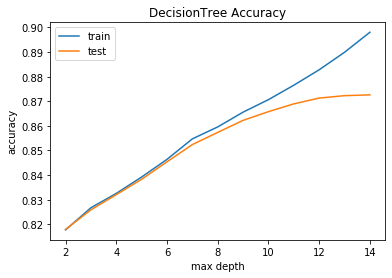

In [ ]:
# try some depths values
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Decision Tree -  data
depth_values = list(range(2,15))
random_state = 318
train_accs = []
test_accs = []

# Loop over different max_depths
for d in depth_values:
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth=d, random_state=random_state)
    my_dt.fit(X_train, y_train)
    # Evaluate on train & test data
    train_accs.append( my_dt.score(X_train, y_train) )
    test_accs.append( my_dt.score(X_test, y_test) )
    
# Plot the results
plt.figure()
plt.plot(depth_values, train_accs, label='train')
plt.plot(depth_values, test_accs, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

max depth over 6-8 starts to overtrain.

In [ ]:
train_accs

[0.8179225,
 0.8258825,
 0.8320525,
 0.8382925,
 0.8454025,
 0.852405,
 0.857355,
 0.8622375,
 0.8657875,
 0.8689475,
 0.8713025,
 0.872285,
 0.872615]

gridsearch takes a long time. try to narrow down the range
* max_depth = np.arange(6,9) 
* min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
* min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
* max_features = list(range(1, X_train.shape[1]))

## test max_features - run on AG
* max_features = {“auto”, “sqrt”, “log2”}
* max_depth = 8 (np.arange(6,9))
* min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
* min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
* max_features = list(range(1, X_train.shape[1]))

In [ ]:
# try some depths values
import os, time
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# get standard machine learning input data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, X_test, y_train, y_test = Nutcracker(datapath).mldata(feature_reduction='None')

# set up time
start_time_all = time.time()
print('timer start')
print(f'test timer {(time.time() - start_time_all)/60:.2f} min')
# hyperparameters
random_state = 318
max_depth = 8
max_features_list = ['sqrt','log2']

# declare output var
test_acc = []
train_acc = []
# test hyperparameter
for max_features in max_features_list:
    print(f'running {max_features}')
    # set up time
    start_time = time.time()
    # start model
    model = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, max_features=max_features)
    model.fit(X_train, y_train)
    # get train score
    train_score = model.score(X_train, y_train)
    print(f"\tTrain Score: {train_score}")
    train_acc.append(train_score)
    # get test score
    test_score = model.score(X_test, y_test)
    test_acc.append(train_score)
    print(f"\tTest Score: {test_score}")
    # print time elapsed
    print(f'\ttook {(time.time() - start_time)/60:.2f} min')

# set up time
print(f'total time: {(time.time() - start_time_all)/60:.2f} min')

# graph results
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(range(len(max_features_list)), train_scores, test_scores, 'max features', 'Decision Tree')

None
None
timer start
test timer 0.00 min
running sqrt
	Train Score: 0.82295875
	Test Score: 0.8212775
	took 0.21 min
running log2
	Train Score: 0.82295875
	Test Score: 0.8212775
	took 0.20 min
total time: 0.42 min


ValueError: x and y must have same first dimension, but have shapes (2,) and (0,)

similar results from activation = sqrt or log 2

## gridsearchcv on sample split, sample_leaf, max_features, max_depth


In [ ]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# define models and parameters
model = DecisionTreeClassifier()
max_depth = np.arange(1,32)
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1, X_train.shape[1]))
random_state = [318]

grid = dict(max_depth=max_depth, min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features, random_state=random_state)

# import data
print(f'import data')
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, _, y_train, _ = Nutcracker(datapath).mldata(feature_reduction='None')

# grid search setting
cv = 5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy',error_score=0, verbose=3)
# run gridsearch
grid_result = grid_search.fit(X_train, y_train)

# summarize results
from brainstation_capstone.ml import GridSearchCVHelper
mean, stdev, param = GridSearchCVHelper.print_summary(grid_result)
print('done')

None
None
Fitting 5 folds for each of 31000 candidates, totalling 155000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 99.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 148.7min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 174.8min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 209.2min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 235.5min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 251.2min


In [ ]:
# visualize tree
# summarize results
from brainstation_capstone.ml import GridSearchCVHelper
mean, stdev, param = GridSearchCVHelper.print_summary(grid_result)
print('done')

did not finish run

## test max_features - run on AG | June 19, 2020 15:17
To test:
* max_features = list(range(1, X_train.shape[1]))
* min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
* min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
Tested:
* max_depth = 8 (np.arange(6,9)) over 8 has diminishing returns.
* max_features = {“sqrt”, “log2”} are both similar. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

# hyperparameters
max_features_list = np.arange(1, data['X_train'].shape[1])
random_state = 318
max_depth = 8

# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in max_features_list:
    print(f'running {parameter}')
    # set up time
    timer.param_start()
    # start model
    model = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, max_features=parameter)
    model_acc.score_data(model, data)
    timer.param_end()

    
# get time
timer.session_end()
time_per_session = timer.get_time()
# get scores
print(model_acc.train_acc)
print(model_acc.test_acc)


loading 4 files
loading completed
timer starts
running 1
	Train Score: 0.659291875
	Test Score: 0.6578125
	elapsed time 0.093min
running 2
	Train Score: 0.737980625
	Test Score: 0.7363875
	elapsed time 0.129min
running 3
	Train Score: 0.790129375
	Test Score: 0.7889525
	elapsed time 0.160min
running 4
	Train Score: 0.82295875
	Test Score: 0.8212775
	elapsed time 0.227min
running 5
	Train Score: 0.83895
	Test Score: 0.8382925
	elapsed time 0.237min
running 6
	Train Score: 0.849538125
	Test Score: 0.84889
	elapsed time 0.291min
running 7
	Train Score: 0.843399375
	Test Score: 0.8416925
	elapsed time 0.287min
running 8
	Train Score: 0.8537025
	Test Score: 0.8518325
	elapsed time 0.320min
running 9
	Train Score: 0.852606875
	Test Score: 0.85043
	elapsed time 0.352min
running 10
	Train Score: 0.853561875
	Test Score: 0.8516175
	elapsed time 0.375min
running 11
	Train Score: 0.854734375
	Test Score: 0.85261
	elapsed time 0.406min
running 12
	Train Score: 0.85717
	Test Score: 0.8557375
	elaps

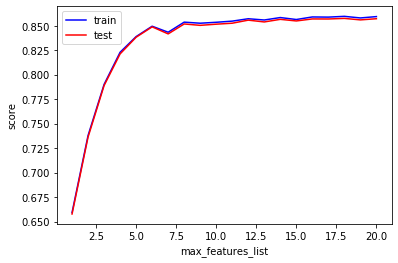

In [ ]:
# graph
hyperparameter_list = max_features_list

from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, 'max_features_list')

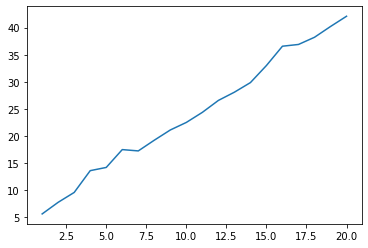

In [ ]:
plt.figure()
plt.plot(hyperparameter_list, time_per_session)
plt.show()


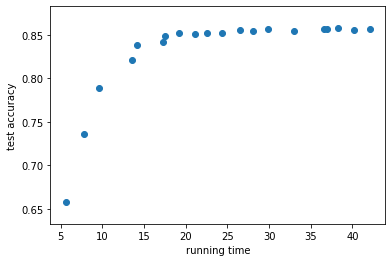

In [ ]:
# plot gain of accuracy vs time spent
plt.figure()
plt.scatter(time_per_session, model_acc.test_acc)
plt.xlabel('running time')
plt.ylabel('test accuracy')
plt.show()

In [ ]:
hyperparameter_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

at about 7-8 max feature list, gain of accuracy outweight running time it takes.

## tune min_samples_leaf 20200619-1631 AG

loading 4 files
loading completed
timer starts
running 0.1
	Train Score: 0.730025625
	Test Score: 0.7302975
	elapsed time 0.138min
running 0.2
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.084min
running 0.30000000000000004
	Train Score: 0.6811875
	Test Score: 0.68218
	elapsed time 0.086min
running 0.4
	Train Score: 0.690823125
	Test Score: 0.6914925
	elapsed time 0.060min
running 0.5
	Train Score: 0.500074375
	Test Score: 0.4997025
	elapsed time 0.060min
total time: 0.428 min


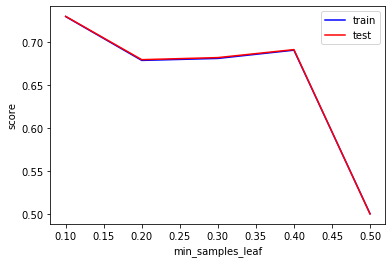

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])
# hyperparameters
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
hyperparameter_list = min_samples_leaf
hyperparameter_name = 'min_samples_leaf'
max_features = 7
random_state = 318
max_depth = 8
# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {parameter}')
    timer.param_start()
    # update here
    model = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, max_features=max_features, min_samples_leaf=parameter)
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


tuning min_samples_leaf made it worse. do not do this.

## tuning min_samples_split 20200619-1639

loading 4 files
loading completed
timer starts
running 0.1
	Train Score: 0.805675625
	Test Score: 0.8058975
	elapsed time 0.191min
running 0.2
	Train Score: 0.734765
	Test Score: 0.7342025
	elapsed time 0.131min
running 0.30000000000000004
	Train Score: 0.7292475
	Test Score: 0.72971
	elapsed time 0.116min
running 0.4
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.088min
running 0.5
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.085min
running 0.6
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.083min
running 0.7000000000000001
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.086min
running 0.8
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.060min
running 0.9
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.061min
running 1.0
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.061min
total time: 0.963 min


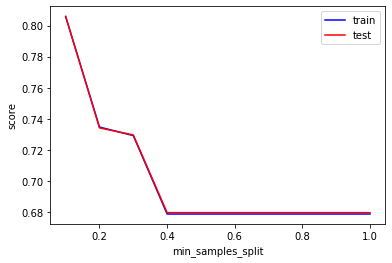

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])
# hyperparameters (do not set min_samples_leaf)
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
hyperparameter_list = min_samples_split
hyperparameter_name = 'min_samples_split'
max_features = 7
random_state = 318
max_depth = 8
# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {parameter}')
    timer.param_start()
    # update here
    model = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, max_features=max_features, min_samples_split=parameter)
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


min_samples_split over 0.1 will drop the score. if wish to tune, use values under 0.1.

Doesn't seem like further tuning will help improve. Focus on other more complex trees.

## Final param evaluation


loading data from directory
loading 4 files

loading completed

runing cross validation scores (this takes a while):
timer starts
total time: 0.484 min
cross validation scores: [0.80874375 0.79761563 0.80545625 0.80434063 0.80725625]
validation score (mean):0.8046825
validation score (std):0.003841203729789639

fit model...
predict model...
timer starts
total time: 0.001 min

accuracy scores:
accuracy score on train: 0.8080175
accuracy score on test: 0.8081925

confusion matrix:

confusion matrix: test data
              Predicted normal  Predicted alcohol
True normal           0.833604           0.166396
True alcohol          0.217249           0.782751

confusion matrix: train data
              Predicted normal  Predicted alcohol
True normal           0.833216           0.166784
True alcohol          0.217174           0.782826

confusion matrix for test


<Figure size 432x288 with 0 Axes>

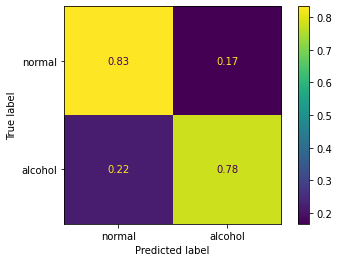


confusion matrix for train


<Figure size 432x288 with 0 Axes>

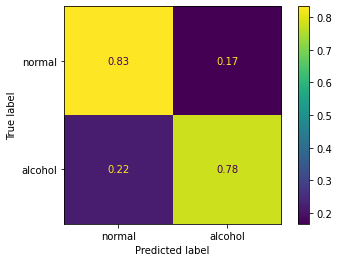


classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81    200119
         1.0       0.82      0.78      0.80    199881

    accuracy                           0.81    400000
   macro avg       0.81      0.81      0.81    400000
weighted avg       0.81      0.81      0.81    400000

precision_score = 0.8245167478235207
recall_score = 0.7827507366883295
f1_score = 0.8030910822124181

real data class proba:
test set normal case probability: 0.4997025
test set alcohol case probability: 0.5002975000000001

 prediction proba:

proba threshold analysis:


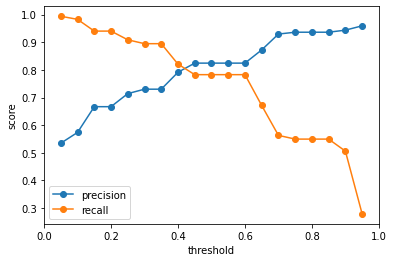


ROC AUC analysis:


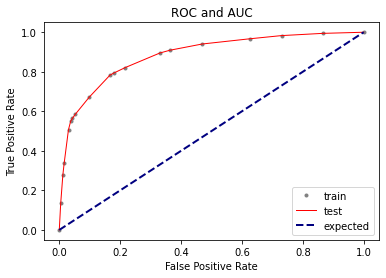

Test AUC score: 0.8843168242077637
Train AUC score: 0.8843475598121028

Saving model...

excel record:
[0.8046825, 0.003841203729789639, 0.8080175, 0.8081925, 0.8245167478235207, 0.7827507366883295, 0.8030910822124181, 0.8843475598121028, 0.8843168242077637, [], []]
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=318, splitter='best')


In [5]:
data_dir = file_dir
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=318, max_depth=8, max_features=8, 
                               min_samples_leaf=1, min_samples_split=0.1)
model_eval = ModelEvaluation(model, data_dir)
model_eval.standard(data_dir)